In [105]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [106]:
import scipy as sp
import statsmodels as sm

In [107]:
movies = pd.read_csv('/Users/manele/Downloads/ml-25m/movies.csv')

In [108]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


# I start by exploring the three datasets :

In [109]:
ratings = pd.read_csv('/Users/manele/Downloads/ml-25m/ratings.csv')

In [110]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [111]:
tags = pd.read_csv('/Users/manele/Downloads/ml-25m/tags.csv')

In [112]:
tags

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


# I merge the datasets movies and ratings together :

In [113]:
df = pd.merge(movies, ratings, on='movieId')

In [114]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [115]:
df['genres'].value_counts()

Drama                                   1765705
Comedy                                  1512682
Comedy|Romance                           902051
Drama|Romance                            796335
Comedy|Drama                             721432
                                         ...   
Children|Comedy|Documentary                   1
Adventure|Fantasy|Sci-Fi|Western              1
Action|Adventure|Crime|Drama|Mystery          1
Adventure|Children|Drama|War                  1
Comedy|Horror|Mystery|Sci-Fi|Western          1
Name: genres, Length: 1621, dtype: int64

In [116]:
tags['tag'].value_counts()

sci-fi              8330
atmospheric         6516
action              5907
comedy              5702
surreal             5326
                    ... 
teen sleuth            1
evil twins             1
paternity test         1
QVC                    1
cornetto triolgy       1
Name: tag, Length: 73050, dtype: int64

In [117]:
df = df[df.groupby('genres').genres.transform(len) > 2]

In [118]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517
...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826


In [119]:
genres = df['genres'].unique()

In [120]:
len(genres)

1535

In [121]:
genres

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Documentary|Drama|Horror', 'Action|Comedy|Horror|Mystery',
       'Animation|Children|Comedy|Fantasy|Horror'], dtype=object)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999968 entries, 0 to 25000094
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   userId     int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.3+ GB


# I decide to get rid of genres that have more than one word by isolating the ones that have "|" as a special charachter :

In [126]:
print([df.genres.str.contains('|')])

[0           True
1           True
2           True
3           True
4           True
            ... 
25000090    True
25000091    True
25000092    True
25000093    True
25000094    True
Name: genres, Length: 24999968, dtype: bool]


In [127]:
print([df.genres.str.contains(r'|')])

[0           True
1           True
2           True
3           True
4           True
            ... 
25000090    True
25000091    True
25000092    True
25000093    True
25000094    True
Name: genres, Length: 24999968, dtype: bool]


In [128]:
df[['genre', 'other']] = df['genres'].str.split('|', 1, expand=True)

In [129]:
df

,movieId,title,genres,userId,rating,timestamp,genre,other
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820,Adventure,Animation|Children|Comedy|Fantasy
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215,Adventure,Animation|Children|Comedy|Fantasy
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252,Adventure,Animation|Children|Comedy|Fantasy
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949,Adventure,Animation|Children|Comedy|Fantasy
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517,Adventure,Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748,Drama,None
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985,Documentary,None
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913,Comedy,Drama
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826,(no genres listed),None


In [130]:
df['genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Sci-Fi',
       'Musical', 'IMAX', '(no genres listed)'], dtype=object)

In [131]:
df['other'].unique()

array(['Animation|Children|Comedy|Fantasy', 'Children|Fantasy', 'Romance',
       'Drama|Romance', None, 'Crime|Thriller', 'Children',
       'Adventure|Thriller', 'Horror', 'Animation|Children',
       'Adventure|Romance', 'Drama', 'Comedy|Crime|Drama|Thriller',
       'Drama|Horror|Mystery|Thriller', 'Sci-Fi',
       'Drama|Fantasy|Mystery|Sci-Fi', 'Sci-Fi|Thriller', 'Romance|IMAX',
       'IMAX', 'Comedy', 'War', 'Crime|Drama', 'Adventure|Fantasy',
       'Drama|Thriller', 'Thriller', 'Children|Drama|Musical|Romance',
       'Mystery|Thriller', 'Children|Comedy|Fantasy', 'Mystery', 'Crime',
       'Comedy|Horror|Thriller', 'Crime|Drama|Thriller',
       'Adventure|Drama', 'Horror|Thriller', 'Horror|Romance',
       'Comedy|Crime|Romance', 'Children|Comedy|Musical', 'Drama|War',
       'Adventure|Comedy|Crime', 'Comedy|Drama', 'Mystery|Romance',
       'Drama|IMAX', 'Drama|Romance|War', 'Drama|Mystery',
       'Adventure|Mystery|Sci-Fi', 'Thriller|War', 'Romance|Western',
       'Fil

In [132]:
df = df.drop('other', axis=1)

In [133]:
df = df.drop('genres', axis=1)

In [134]:
df

,movieId,title,userId,rating,timestamp,genre
0,1,Toy Story (1995),2,3.5,1141415820,Adventure
1,1,Toy Story (1995),3,4.0,1439472215,Adventure
2,1,Toy Story (1995),4,3.0,1573944252,Adventure
3,1,Toy Story (1995),5,4.0,858625949,Adventure
4,1,Toy Story (1995),8,4.0,890492517,Adventure
...,...,...,...,...,...,...
25000090,209157,We (2018),119571,1.5,1574280748,Drama
25000091,209159,Window of the Soul (2001),115835,3.0,1574280985,Documentary
25000092,209163,Bad Poems (2018),6964,4.5,1574284913,Comedy
25000093,209169,A Girl Thing (2001),119571,3.0,1574291826,(no genres listed)


In [135]:
df = df[df.genre != '(no genres listed)']

In [136]:
df

,movieId,title,userId,rating,timestamp,genre
0,1,Toy Story (1995),2,3.5,1141415820,Adventure
1,1,Toy Story (1995),3,4.0,1439472215,Adventure
2,1,Toy Story (1995),4,3.0,1573944252,Adventure
3,1,Toy Story (1995),5,4.0,858625949,Adventure
4,1,Toy Story (1995),8,4.0,890492517,Adventure
...,...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),134916,5.0,1574272160,Action
25000090,209157,We (2018),119571,1.5,1574280748,Drama
25000091,209159,Window of the Soul (2001),115835,3.0,1574280985,Documentary
25000092,209163,Bad Poems (2018),6964,4.5,1574284913,Comedy


In [137]:
df = df.drop('userId', axis=1)

In [138]:
df

,movieId,title,rating,timestamp,genre
0,1,Toy Story (1995),3.5,1141415820,Adventure
1,1,Toy Story (1995),4.0,1439472215,Adventure
2,1,Toy Story (1995),3.0,1573944252,Adventure
3,1,Toy Story (1995),4.0,858625949,Adventure
4,1,Toy Story (1995),4.0,890492517,Adventure
...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,1574272160,Action
25000090,209157,We (2018),1.5,1574280748,Drama
25000091,209159,Window of the Soul (2001),3.0,1574280985,Documentary
25000092,209163,Bad Poems (2018),4.5,1574284913,Comedy


In [140]:
df['title'].value_counts()

Forrest Gump (1994)                                   81491
Shawshank Redemption, The (1994)                      81482
Pulp Fiction (1994)                                   79672
Silence of the Lambs, The (1991)                      74127
Matrix, The (1999)                                    72674
                                                      ...  
Kevin Bridges Live: A Whole Different Story (2015)        1
Mike Epps: Don't Take It Personal (2015)                  1
Scavengers (2013)                                         1
Jerrod Carmichael: Love at the Store (2014)               1
Women of Devil's Island (1962)                            1
Name: title, Length: 54313, dtype: int64

In [141]:
df = df.drop('timestamp', axis=1)

In [142]:
df

,movieId,title,rating,genre
0,1,Toy Story (1995),3.5,Adventure
1,1,Toy Story (1995),4.0,Adventure
2,1,Toy Story (1995),3.0,Adventure
3,1,Toy Story (1995),4.0,Adventure
4,1,Toy Story (1995),4.0,Adventure
...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action
25000090,209157,We (2018),1.5,Drama
25000091,209159,Window of the Soul (2001),3.0,Documentary
25000092,209163,Bad Poems (2018),4.5,Comedy


In [143]:
df['movieId'].value_counts()

356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
169508        1
169510        1
169512        1
169514        1
209171        1
Name: movieId, Length: 54389, dtype: int64

In [144]:
df['title'].value_counts()

Forrest Gump (1994)                                   81491
Shawshank Redemption, The (1994)                      81482
Pulp Fiction (1994)                                   79672
Silence of the Lambs, The (1991)                      74127
Matrix, The (1999)                                    72674
                                                      ...  
Kevin Bridges Live: A Whole Different Story (2015)        1
Mike Epps: Don't Take It Personal (2015)                  1
Scavengers (2013)                                         1
Jerrod Carmichael: Love at the Store (2014)               1
Women of Devil's Island (1962)                            1
Name: title, Length: 54313, dtype: int64

In [145]:
df2 = df[df.duplicated('movieId')]

In [146]:
df2

,movieId,title,rating,genre
1,1,Toy Story (1995),4.0,Adventure
2,1,Toy Story (1995),3.0,Adventure
3,1,Toy Story (1995),4.0,Adventure
4,1,Toy Story (1995),4.0,Adventure
5,1,Toy Story (1995),3.5,Adventure
...,...,...,...,...
25000041,208939,Klaus (2019),3.0,Adventure
25000042,208939,Klaus (2019),4.0,Adventure
25000067,209085,The Mistletoe Secret (2019),5.0,Romance
25000079,209135,Jane B. by Agnès V. (1988),3.5,Documentary


## I now will find the average rating for each title from each user rating :

In [147]:
df2['avg_rating2'] = df.groupby('title')['rating'].mean()

/var/folders/bf/6bkz0r_n2gv741cyht30r3900000gn/T/ipykernel_56130/865566734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_rating2'] = df.groupby('title')['rating'].mean()


In [148]:
df2

,movieId,title,rating,genre,avg_rating2
1,1,Toy Story (1995),4.0,Adventure,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN
5,1,Toy Story (1995),3.5,Adventure,NaN
...,...,...,...,...,...
25000041,208939,Klaus (2019),3.0,Adventure,NaN
25000042,208939,Klaus (2019),4.0,Adventure,NaN
25000067,209085,The Mistletoe Secret (2019),5.0,Romance,NaN
25000079,209135,Jane B. by Agnès V. (1988),3.5,Documentary,NaN


In [149]:
result = df.groupby('title')['rating'].mean()

In [150]:
result

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.896648
#1 Cheerleader Camp (2010)                                 2.111111
#Captured (2017)                                           3.750000
#Female Pleasure (2018)                                    3.666667
                                                             ...   
काशी - In Search of Ganga (2018)                           0.500000
…And the Fifth Horseman Is Fear (1965)                     3.250000
キサラギ (2007)                                                3.250000
チェブラーシカ (2010)                                             3.166667
貞子3D (2012)                                                2.375000
Name: rating, Length: 54313, dtype: float64

In [151]:
result2 = df.groupby('title')['rating'].mean()

In [152]:
result2

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.896648
#1 Cheerleader Camp (2010)                                 2.111111
#Captured (2017)                                           3.750000
#Female Pleasure (2018)                                    3.666667
                                                             ...   
काशी - In Search of Ganga (2018)                           0.500000
…And the Fifth Horseman Is Fear (1965)                     3.250000
キサラギ (2007)                                                3.250000
チェブラーシカ (2010)                                             3.166667
貞子3D (2012)                                                2.375000
Name: rating, Length: 54313, dtype: float64

In [153]:
df3 = df

In [154]:
df3['avg_rating']=result

In [155]:
df3

,movieId,title,rating,genre,avg_rating
0,1,Toy Story (1995),3.5,Adventure,NaN
1,1,Toy Story (1995),4.0,Adventure,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN
...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN
25000090,209157,We (2018),1.5,Drama,NaN
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN


In [156]:
df.loc[df['title']=='Toy Story (1995)']

,movieId,title,rating,genre,avg_rating
0,1,Toy Story (1995),3.5,Adventure,NaN
1,1,Toy Story (1995),4.0,Adventure,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN
...,...,...,...,...,...
57304,1,Toy Story (1995),2.0,Adventure,NaN
57305,1,Toy Story (1995),5.0,Adventure,NaN
57306,1,Toy Story (1995),4.5,Adventure,NaN
57307,1,Toy Story (1995),4.0,Adventure,NaN


In [157]:
df.loc[df['title']=='Toy Story (1995)']['movieId']!=1

0        False
1        False
2        False
3        False
4        False
         ...  
57304    False
57305    False
57306    False
57307    False
57308    False
Name: movieId, Length: 57309, dtype: bool

In [158]:
df

,movieId,title,rating,genre,avg_rating
0,1,Toy Story (1995),3.5,Adventure,NaN
1,1,Toy Story (1995),4.0,Adventure,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN
...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN
25000090,209157,We (2018),1.5,Drama,NaN
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN


## After many tries I decide to create a new data frame with the average rating :

In [159]:
df.loc[df['title']=='Toy Story (1995)']['rating'].mean()

3.893707794587238

In [160]:
df.loc[df['movieId']==1]['rating'].mean()

3.893707794587238

In [161]:
dftest = df.groupby('title')['rating'].mean()

In [162]:
dftest = pd.DataFrame(dftest)

In [163]:
dftest

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.896648
#1 Cheerleader Camp (2010),2.111111
#Captured (2017),3.750000
#Female Pleasure (2018),3.666667
...,...
काशी - In Search of Ganga (2018),0.500000
…And the Fifth Horseman Is Fear (1965),3.250000
キサラギ (2007),3.250000


In [164]:
dftest['title'] = dftest.index

In [ ]:
# I check that the average rating is correct

In [165]:
dftest.loc[dftest['title']=='Toy Story (1995)'] 

,rating,title
title,,
Toy Story (1995),3.893708,Toy Story (1995)


In [166]:
title_rating = dftest

In [167]:
df.drop('avg_rating', axis = 1, inplace = True)

In [168]:
#df4 = df

In [169]:
#df4['count'] = df['title'].value_counts()

In [170]:
#df4

,movieId,title,rating,genre,count
0,1,Toy Story (1995),3.5,Adventure,NaN
1,1,Toy Story (1995),4.0,Adventure,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN
...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN
25000090,209157,We (2018),1.5,Drama,NaN
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN


In [171]:
dftest2 = df.groupby('movieId')['title'].count()

In [172]:
dftest2 = pd.DataFrame(dftest2)

In [173]:
dftest2

,title
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714
...,...
209155,1
209157,1
209159,1


In [174]:
title_rating

,rating,title
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth..."
"""Great Performances"" Cats (1998)",2.896648,"""Great Performances"" Cats (1998)"
#1 Cheerleader Camp (2010),2.111111,#1 Cheerleader Camp (2010)
#Captured (2017),3.750000,#Captured (2017)
#Female Pleasure (2018),3.666667,#Female Pleasure (2018)
...,...,...
काशी - In Search of Ganga (2018),0.500000,काशी - In Search of Ganga (2018)
…And the Fifth Horseman Is Fear (1965),3.250000,…And the Fifth Horseman Is Fear (1965)
キサラギ (2007),3.250000,キサラギ (2007)


In [175]:
df

,movieId,title,rating,genre,count
0,1,Toy Story (1995),3.5,Adventure,NaN
1,1,Toy Story (1995),4.0,Adventure,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN
...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN
25000090,209157,We (2018),1.5,Drama,NaN
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN


In [176]:
df_new = df.drop_duplicates(subset=['title'])

In [177]:
df_new

,movieId,title,rating,genre,count
0,1,Toy Story (1995),3.5,Adventure,NaN
57309,2,Jumanji (1995),5.0,Adventure,NaN
81537,3,Grumpier Old Men (1995),4.0,Comedy,NaN
93341,4,Waiting to Exhale (1995),3.0,Comedy,NaN
95864,5,Father of the Bride Part II (1995),4.0,Comedy,NaN
...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN
25000090,209157,We (2018),1.5,Drama,NaN
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN


In [178]:
title_rating

,rating,title
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth..."
"""Great Performances"" Cats (1998)",2.896648,"""Great Performances"" Cats (1998)"
#1 Cheerleader Camp (2010),2.111111,#1 Cheerleader Camp (2010)
#Captured (2017),3.750000,#Captured (2017)
#Female Pleasure (2018),3.666667,#Female Pleasure (2018)
...,...,...
काशी - In Search of Ganga (2018),0.500000,काशी - In Search of Ganga (2018)
…And the Fifth Horseman Is Fear (1965),3.250000,…And the Fifth Horseman Is Fear (1965)
キサラギ (2007),3.250000,キサラギ (2007)


In [179]:
title_rating.reset_index(drop=True, inplace = True)

In [180]:
df_new = pd.merge(df_new, title_rating, on='title')

In [181]:
df_new

,movieId,title,rating_x,genre,count,rating_y
0,1,Toy Story (1995),3.5,Adventure,NaN,3.893708
1,2,Jumanji (1995),5.0,Adventure,NaN,3.251527
2,3,Grumpier Old Men (1995),4.0,Comedy,NaN,3.142028
3,4,Waiting to Exhale (1995),3.0,Comedy,NaN,2.853547
4,5,Father of the Bride Part II (1995),4.0,Comedy,NaN,3.058434
...,...,...,...,...,...,...
54308,209155,Santosh Subramaniam (2008),5.0,Action,NaN,5.000000
54309,209157,We (2018),1.5,Drama,NaN,1.500000
54310,209159,Window of the Soul (2001),3.0,Documentary,NaN,3.000000
54311,209163,Bad Poems (2018),4.5,Comedy,NaN,4.500000


In [182]:
#Checking the rating_y is accurate
df.loc[df['title']=='Jumanji (1995)']['rating'].mean()

3.2515271586594023

In [183]:
df.loc[df['title']=='Grumpier Old Men (1995)']['rating'].mean()

3.142028126058963

In [185]:
df

,movieId,title,rating,genre,count
0,1,Toy Story (1995),3.5,Adventure,NaN
1,1,Toy Story (1995),4.0,Adventure,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN
...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN
25000090,209157,We (2018),1.5,Drama,NaN
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN


## I also include a column where I count the number of times a title appear so that I can evaluate its popularity :

In [186]:
df['Counts'] = df.groupby(['title'])['movieId'].transform('count')

In [187]:
df

,movieId,title,rating,genre,count,Counts
0,1,Toy Story (1995),3.5,Adventure,NaN,57309
1,1,Toy Story (1995),4.0,Adventure,NaN,57309
2,1,Toy Story (1995),3.0,Adventure,NaN,57309
3,1,Toy Story (1995),4.0,Adventure,NaN,57309
4,1,Toy Story (1995),4.0,Adventure,NaN,57309
...,...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN,1
25000090,209157,We (2018),1.5,Drama,NaN,1
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN,1
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN,1


In [188]:
df_weird = df[['title','Counts']]

In [189]:
df_weird

,title,Counts
0,Toy Story (1995),57309
1,Toy Story (1995),57309
2,Toy Story (1995),57309
3,Toy Story (1995),57309
4,Toy Story (1995),57309
...,...,...
25000089,Santosh Subramaniam (2008),1
25000090,We (2018),1
25000091,Window of the Soul (2001),1
25000092,Bad Poems (2018),1


In [190]:
df_weird = df_weird.drop_duplicates(subset=['title'])

In [191]:
df_weird

,title,Counts
0,Toy Story (1995),57309
57309,Jumanji (1995),24228
81537,Grumpier Old Men (1995),11804
93341,Waiting to Exhale (1995),2523
95864,Father of the Bride Part II (1995),11714
...,...,...
25000089,Santosh Subramaniam (2008),1
25000090,We (2018),1
25000091,Window of the Soul (2001),1
25000092,Bad Poems (2018),1


In [192]:
df_new = pd.merge(df_new, df_weird, on='title')

In [193]:
df_new

,movieId,title,rating_x,genre,count,rating_y,Counts
0,1,Toy Story (1995),3.5,Adventure,NaN,3.893708,57309
1,2,Jumanji (1995),5.0,Adventure,NaN,3.251527,24228
2,3,Grumpier Old Men (1995),4.0,Comedy,NaN,3.142028,11804
3,4,Waiting to Exhale (1995),3.0,Comedy,NaN,2.853547,2523
4,5,Father of the Bride Part II (1995),4.0,Comedy,NaN,3.058434,11714
...,...,...,...,...,...,...,...
54308,209155,Santosh Subramaniam (2008),5.0,Action,NaN,5.000000,1
54309,209157,We (2018),1.5,Drama,NaN,1.500000,1
54310,209159,Window of the Soul (2001),3.0,Documentary,NaN,3.000000,1
54311,209163,Bad Poems (2018),4.5,Comedy,NaN,4.500000,1


In [194]:
df_new.dropna()

,movieId,title,rating_x,genre,count,rating_y,Counts


In [195]:
df_new.rename(columns={'rating_y': 'avg_rating'}, inplace=True)

In [196]:
df_new

,movieId,title,rating_x,genre,count,avg_rating,Counts
0,1,Toy Story (1995),3.5,Adventure,NaN,3.893708,57309
1,2,Jumanji (1995),5.0,Adventure,NaN,3.251527,24228
2,3,Grumpier Old Men (1995),4.0,Comedy,NaN,3.142028,11804
3,4,Waiting to Exhale (1995),3.0,Comedy,NaN,2.853547,2523
4,5,Father of the Bride Part II (1995),4.0,Comedy,NaN,3.058434,11714
...,...,...,...,...,...,...,...
54308,209155,Santosh Subramaniam (2008),5.0,Action,NaN,5.000000,1
54309,209157,We (2018),1.5,Drama,NaN,1.500000,1
54310,209159,Window of the Soul (2001),3.0,Documentary,NaN,3.000000,1
54311,209163,Bad Poems (2018),4.5,Comedy,NaN,4.500000,1


## The dataframe is clean!

In [198]:
df_new.loc[df_new['Counts']==3]

,movieId,title,rating_x,genre,count,avg_rating,Counts
3483,3582,"Jails, Hospitals & Hip-Hop (2000)",2.0,Comedy,NaN,2.166667,3
3967,4071,Dog Run (1996),1.0,Drama,NaN,2.166667,3
4714,4820,Won't Anybody Listen? (2000),2.0,Documentary,NaN,1.500000,3
5222,5330,Some Body (2001),2.5,Drama,NaN,3.333333,3
5457,5565,"Dogwalker, The (2002)",0.5,Drama,NaN,1.500000,3
...,...,...,...,...,...,...,...
54087,208042,Text (2019),0.5,Drama,NaN,1.833333,3
54120,208170,Arsenio Hall: Smart and Classy (2019),3.0,Comedy,NaN,2.500000,3
54139,208247,The Awakening of Motti Wolkenbruch (2018),3.5,Comedy,NaN,3.333333,3
54240,208765,Picture a Perfect Christmas (2019),3.0,Romance,NaN,2.833333,3


<AxesSubplot:xlabel='Counts'>

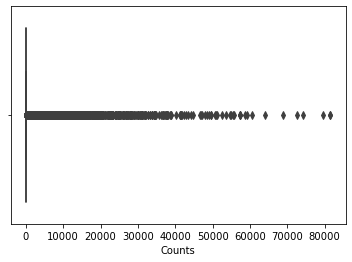

In [199]:
sns.boxplot(data=df_new, x='Counts', y=None)

In [200]:
df_new = df_new[df_new.genre != 'IMAX']

<AxesSubplot:xlabel='genre', ylabel='avg_rating'>

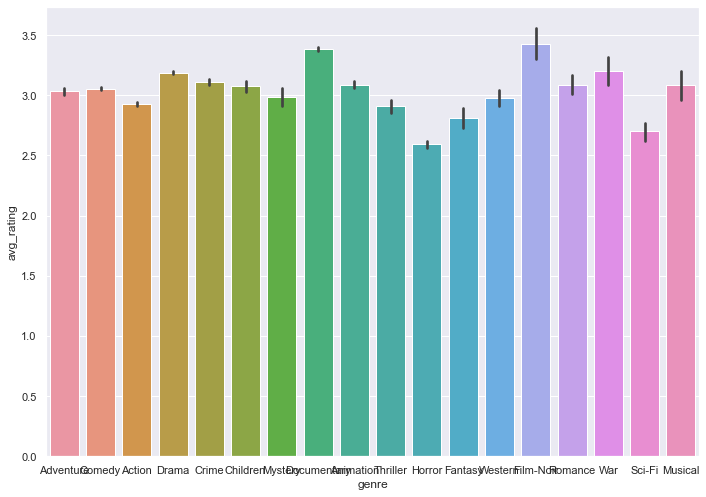

In [201]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_new,x='genre', y='avg_rating')

[Text(0, 0, 'Adventure'),
 Text(1, 0, 'Comedy'),
 Text(2, 0, 'Action'),
 Text(3, 0, 'Drama'),
 Text(4, 0, 'Crime'),
 Text(5, 0, 'Children'),
 Text(6, 0, 'Mystery'),
 Text(7, 0, 'Documentary'),
 Text(8, 0, 'Animation'),
 Text(9, 0, 'Thriller'),
 Text(10, 0, 'Horror'),
 Text(11, 0, 'Fantasy'),
 Text(12, 0, 'Western'),
 Text(13, 0, 'Film-Noir'),
 Text(14, 0, 'Romance'),
 Text(15, 0, 'War'),
 Text(16, 0, 'Sci-Fi'),
 Text(17, 0, 'Musical')]

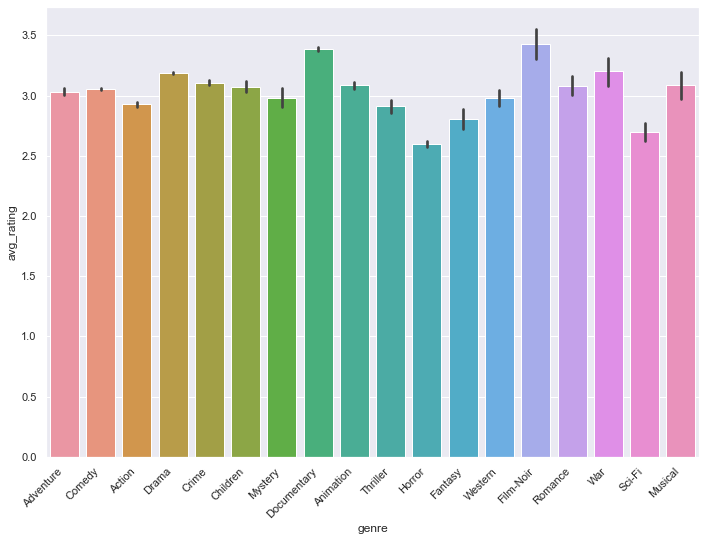

In [202]:
g = sns.barplot(data=df_new,x='genre', y='avg_rating')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Adventure'),
 Text(1, 0, 'Comedy'),
 Text(2, 0, 'Action'),
 Text(3, 0, 'Drama'),
 Text(4, 0, 'Crime'),
 Text(5, 0, 'Children'),
 Text(6, 0, 'Mystery'),
 Text(7, 0, 'Documentary'),
 Text(8, 0, 'Animation'),
 Text(9, 0, 'Thriller'),
 Text(10, 0, 'Horror'),
 Text(11, 0, 'Fantasy'),
 Text(12, 0, 'Western'),
 Text(13, 0, 'Film-Noir'),
 Text(14, 0, 'Romance'),
 Text(15, 0, 'War'),
 Text(16, 0, 'Sci-Fi'),
 Text(17, 0, 'Musical')]

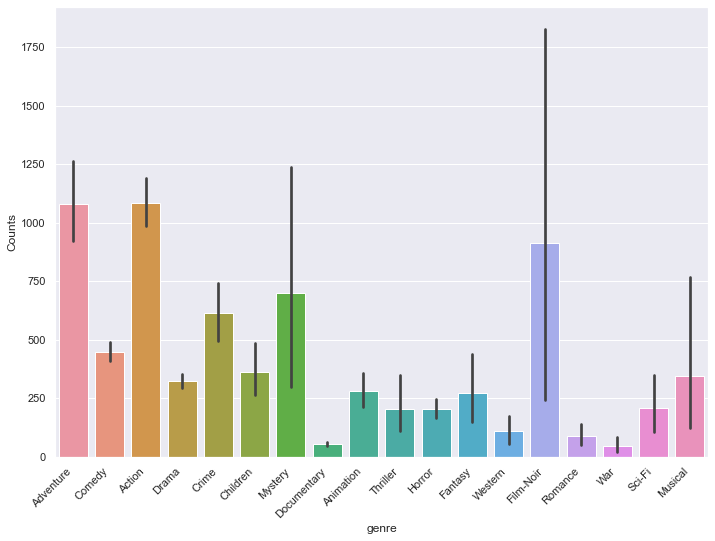

In [203]:
g = sns.barplot(data=df_new,x='genre', y='Counts')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [204]:
df_new.to_csv('movielens.csv')

In [205]:
df_new.to_csv('/Users/manele/Desktop/movielens.csv')

In [206]:
df_new

,movieId,title,rating_x,genre,count,avg_rating,Counts
0,1,Toy Story (1995),3.5,Adventure,NaN,3.893708,57309
1,2,Jumanji (1995),5.0,Adventure,NaN,3.251527,24228
2,3,Grumpier Old Men (1995),4.0,Comedy,NaN,3.142028,11804
3,4,Waiting to Exhale (1995),3.0,Comedy,NaN,2.853547,2523
4,5,Father of the Bride Part II (1995),4.0,Comedy,NaN,3.058434,11714
...,...,...,...,...,...,...,...
54308,209155,Santosh Subramaniam (2008),5.0,Action,NaN,5.000000,1
54309,209157,We (2018),1.5,Drama,NaN,1.500000,1
54310,209159,Window of the Soul (2001),3.0,Documentary,NaN,3.000000,1
54311,209163,Bad Poems (2018),4.5,Comedy,NaN,4.500000,1


In [207]:
df

,movieId,title,rating,genre,count,Counts
0,1,Toy Story (1995),3.5,Adventure,NaN,57309
1,1,Toy Story (1995),4.0,Adventure,NaN,57309
2,1,Toy Story (1995),3.0,Adventure,NaN,57309
3,1,Toy Story (1995),4.0,Adventure,NaN,57309
4,1,Toy Story (1995),4.0,Adventure,NaN,57309
...,...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN,1
25000090,209157,We (2018),1.5,Drama,NaN,1
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN,1
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN,1


In [208]:
occur = df.groupby(['title']).size()

In [209]:
occur

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)      1
"Great Performances" Cats (1998)                           179
#1 Cheerleader Camp (2010)                                   9
#Captured (2017)                                             2
#Female Pleasure (2018)                                      3
                                                          ... 
काशी - In Search of Ganga (2018)                             1
…And the Fifth Horseman Is Fear (1965)                       2
キサラギ (2007)                                                  2
チェブラーシカ (2010)                                               9
貞子3D (2012)                                                 12
Length: 54313, dtype: int64

In [210]:
df_test_3 = df

In [211]:
df_test_3['popularity'] = occur

In [212]:
df_test_3

,movieId,title,rating,genre,count,Counts,popularity
0,1,Toy Story (1995),3.5,Adventure,NaN,57309,NaN
1,1,Toy Story (1995),4.0,Adventure,NaN,57309,NaN
2,1,Toy Story (1995),3.0,Adventure,NaN,57309,NaN
3,1,Toy Story (1995),4.0,Adventure,NaN,57309,NaN
4,1,Toy Story (1995),4.0,Adventure,NaN,57309,NaN
...,...,...,...,...,...,...,...
25000089,209155,Santosh Subramaniam (2008),5.0,Action,NaN,1,NaN
25000090,209157,We (2018),1.5,Drama,NaN,1,NaN
25000091,209159,Window of the Soul (2001),3.0,Documentary,NaN,1,NaN
25000092,209163,Bad Poems (2018),4.5,Comedy,NaN,1,NaN


In [213]:
df_test_3['popularity']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
25000089   NaN
25000090   NaN
25000091   NaN
25000092   NaN
25000094   NaN
Name: popularity, Length: 24973341, dtype: float64

In [214]:
display(occur)

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)      1
"Great Performances" Cats (1998)                           179
#1 Cheerleader Camp (2010)                                   9
#Captured (2017)                                             2
#Female Pleasure (2018)                                      3
                                                          ... 
काशी - In Search of Ganga (2018)                             1
…And the Fifth Horseman Is Fear (1965)                       2
キサラギ (2007)                                                  2
チェブラーシカ (2010)                                               9
貞子3D (2012)                                                 12
Length: 54313, dtype: int64

In [215]:
occur.dtype

dtype('int64')

In [216]:
occur = pd.DataFrame(occur)

In [217]:
occur

,0
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",1
"""Great Performances"" Cats (1998)",179
#1 Cheerleader Camp (2010),9
#Captured (2017),2
#Female Pleasure (2018),3
...,...
काशी - In Search of Ganga (2018),1
…And the Fifth Horseman Is Fear (1965),2
キサラギ (2007),2


In [218]:
occur.reset_index()

,title,0
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",179
2,#1 Cheerleader Camp (2010),9
3,#Captured (2017),2
4,#Female Pleasure (2018),3
...,...,...
54308,काशी - In Search of Ganga (2018),1
54309,…And the Fifth Horseman Is Fear (1965),2
54310,キサラギ (2007),2
54311,チェブラーシカ (2010),9


In [219]:
df_new = pd.merge(df_new, occur, on='title')

In [220]:
df_new

,movieId,title,rating_x,genre,count,avg_rating,Counts,0
0,1,Toy Story (1995),3.5,Adventure,NaN,3.893708,57309,57309
1,2,Jumanji (1995),5.0,Adventure,NaN,3.251527,24228,24228
2,3,Grumpier Old Men (1995),4.0,Comedy,NaN,3.142028,11804,11804
3,4,Waiting to Exhale (1995),3.0,Comedy,NaN,2.853547,2523,2523
4,5,Father of the Bride Part II (1995),4.0,Comedy,NaN,3.058434,11714,11714
...,...,...,...,...,...,...,...,...
54307,209155,Santosh Subramaniam (2008),5.0,Action,NaN,5.000000,1,1
54308,209157,We (2018),1.5,Drama,NaN,1.500000,1,1
54309,209159,Window of the Soul (2001),3.0,Documentary,NaN,3.000000,1,1
54310,209163,Bad Poems (2018),4.5,Comedy,NaN,4.500000,1,1


In [223]:
df_new.rename({'0': 'pop'}, axis=1, inplace=True)

In [226]:
df_new

,movieId,title,rating_x,genre,count,avg_rating,Counts,0
0,1,Toy Story (1995),3.5,Adventure,NaN,3.893708,57309,57309
1,2,Jumanji (1995),5.0,Adventure,NaN,3.251527,24228,24228
2,3,Grumpier Old Men (1995),4.0,Comedy,NaN,3.142028,11804,11804
3,4,Waiting to Exhale (1995),3.0,Comedy,NaN,2.853547,2523,2523
4,5,Father of the Bride Part II (1995),4.0,Comedy,NaN,3.058434,11714,11714
...,...,...,...,...,...,...,...,...
54307,209155,Santosh Subramaniam (2008),5.0,Action,NaN,5.000000,1,1
54308,209157,We (2018),1.5,Drama,NaN,1.500000,1,1
54309,209159,Window of the Soul (2001),3.0,Documentary,NaN,3.000000,1,1
54310,209163,Bad Poems (2018),4.5,Comedy,NaN,4.500000,1,1


In [227]:
df_new.columns

Index(['movieId', 'title', 'rating_x', 'genre', 'count', 'avg_rating',
       'Counts', 0],
      dtype='object')

In [228]:
df_new.drop(['count',0],axis=1, inplace=True)

In [230]:
df_new.rename({'Counts': 'nb_reviews'}, axis=1, inplace=True)

In [231]:
df_new

,movieId,title,rating_x,genre,avg_rating,nb_reviews
0,1,Toy Story (1995),3.5,Adventure,3.893708,57309
1,2,Jumanji (1995),5.0,Adventure,3.251527,24228
2,3,Grumpier Old Men (1995),4.0,Comedy,3.142028,11804
3,4,Waiting to Exhale (1995),3.0,Comedy,2.853547,2523
4,5,Father of the Bride Part II (1995),4.0,Comedy,3.058434,11714
...,...,...,...,...,...,...
54307,209155,Santosh Subramaniam (2008),5.0,Action,5.000000,1
54308,209157,We (2018),1.5,Drama,1.500000,1
54309,209159,Window of the Soul (2001),3.0,Documentary,3.000000,1
54310,209163,Bad Poems (2018),4.5,Comedy,4.500000,1


In [233]:
df_new.to_csv('/Users/manele/Desktop/movielens2.csv')

In [254]:
df_top = df_new

In [255]:
df_top.drop('movieId', axis=1, inplace=True)

In [256]:
df_top

,title,rating_x,genre,avg_rating,nb_reviews
0,Toy Story (1995),3.5,Adventure,3.893708,57309
1,Jumanji (1995),5.0,Adventure,3.251527,24228
2,Grumpier Old Men (1995),4.0,Comedy,3.142028,11804
3,Waiting to Exhale (1995),3.0,Comedy,2.853547,2523
4,Father of the Bride Part II (1995),4.0,Comedy,3.058434,11714
...,...,...,...,...,...
54307,Santosh Subramaniam (2008),5.0,Action,5.000000,1
54308,We (2018),1.5,Drama,1.500000,1
54309,Window of the Soul (2001),3.0,Documentary,3.000000,1
54310,Bad Poems (2018),4.5,Comedy,4.500000,1


In [257]:
top3_movies = df_top.groupby(["genre"])["avg_rating"].nlargest(3)  

In [258]:
top3_movies = pd.DataFrame(top3_movies)

In [259]:
top3_movies.columns

Index(['avg_rating'], dtype='object')

In [261]:
top3_movies

avg_rating
genre                        
Action      23346    5.000000
            23663    5.000000
            25099    5.000000
Adventure   27473    5.000000
            27787    5.000000
            28981    5.000000
Animation   37898    5.000000
            43371    5.000000
            45809    5.000000
Children    23662    5.000000
            24114    5.000000
            25128    5.000000
Comedy      18452    5.000000
            18979    5.000000
            21200    5.000000
Crime       24023    5.000000
            24450    5.000000
            24686    5.000000
Documentary 9412     5.000000
            9638     5.000000
            16434    5.000000
Drama       15749    5.000000
            20318    5.000000
            20375    5.000000
Fantasy     43458    5.000000
            38773    4.500000
            38879    4.500000
Film-Noir   1181     4.201487
            909      4.161201
            892      4.154075
Horror      17956    5.000000
            23180    5.000000
            23509    5.000000
Musical     23610    4.500000
            21388    4.000000
            23516    4.000000
Mystery     28854    5.000000
            29603    5.000000
            30438    5.000000
Romance     21800    5.000000
            24185    5.000000
            26128    5.000000
Sci-Fi      31672    5.000000
            32474    5.000000
            38818    5.000000
Thriller    20096    5.000000
            24362    5.000000
            24384    5.000000
War         30546    5.000000
            25016    4.500000
            43707    4.500000
Western     21492    5.000000
            24744    5.000000
            25802    5.000000

In [262]:
top3_movies.reset_index()

,genre,level_1,avg_rating
0,Action,23346,5.000000
1,Action,23663,5.000000
2,Action,25099,5.000000
3,Adventure,27473,5.000000
4,Adventure,27787,5.000000
5,Adventure,28981,5.000000
6,Animation,37898,5.000000
7,Animation,43371,5.000000
8,Animation,45809,5.000000
9,Children,23662,5.000000


In [263]:
top3_movies.rename({'level_1': 'movieId'}, axis=1, inplace=True)

In [272]:
top3_movies

,genre,movieId,avg_rating,title
0,Adventure,27473,5.000000,American Psycho II: All American Girl (2002)
1,Adventure,27787,5.000000,Inuyasha the Movie: The Castle Beyond the Look...
2,Film-Noir,1181,4.201487,"Shooter, The (1997)"
3,Film-Noir,909,4.161201,"Apartment, The (1960)"
4,Film-Noir,892,4.154075,Twelfth Night (1996)
5,Romance,26128,5.000000,What a Way to Go! (1964)
6,Sci-Fi,31672,5.000000,"Blade, The (Dao) (1995)"
7,Western,25802,5.000000,"Son of Kong, The (1933)"


In [266]:
top3_movies.reset_index(inplace=True)

In [269]:
top3_movies.rename({'level_1': 'movieId'}, axis=1, inplace=True)

In [270]:
top3_movies = pd.merge(top3_movies, titles, on='movieId')

In [271]:
top3_movies

,genre,movieId,avg_rating,title
0,Adventure,27473,5.000000,American Psycho II: All American Girl (2002)
1,Adventure,27787,5.000000,Inuyasha the Movie: The Castle Beyond the Look...
2,Film-Noir,1181,4.201487,"Shooter, The (1997)"
3,Film-Noir,909,4.161201,"Apartment, The (1960)"
4,Film-Noir,892,4.154075,Twelfth Night (1996)
5,Romance,26128,5.000000,What a Way to Go! (1964)
6,Sci-Fi,31672,5.000000,"Blade, The (Dao) (1995)"
7,Western,25802,5.000000,"Son of Kong, The (1933)"


In [1]:
df_new

NameError: name 'df_new' is not defined